# Chapter 7 - Scatterplots, Association, and Correlation

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

* **scatterplot**: display the relationship between two _quantitative_ variables
* show patterns, trends, relationships, and outliers
* ideal method for picturing **associations** between variables

## Looking at Scatterplots

Things to look for:

* **direction**: i.e. _negative_, _positive_
* **form**: 
  * **linear**
  * gentle curves can often be transformed to make them more nearly straight
* strength of relationship
* unexpected values
  * **outliers**

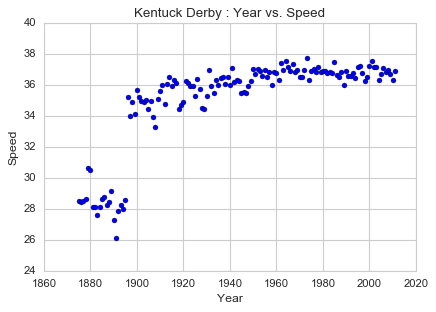

In [2]:
derby = pd.read_table("./data/Kentucky_Derby_2011.txt")

plt.scatter(derby.Year, derby.speed);
plt.xlabel("Year")
plt.ylabel("Speed")
plt.title("Kentuck Derby : Year vs. Speed");

## Roles for Variables

* **response variable**: variable of interest
  * plot on _y_-axis
* **explanatory** or **predictor variable**
  * plot on _x_-axis

## Correlation

* standardize _x_- and _y_-variables
* create scatterplot of standardized values
* points in quadrant I and III support a positive relationship
* points in quadrant II and IV support a negative relationship
* points with either standardized value (_x_ or _y_) = 0 have no impact on the relationship

**Correlation coefficient**

$r = \frac{\sum{Z_xZ_y}}{n-1}$

In [3]:
# calc with numpy
np.corrcoef(derby.Year, derby.speed)

array([[ 1.        ,  0.74949735],
       [ 0.74949735,  1.        ]])

In [4]:
# calc with scipy
import scipy.stats as stats
stats.pearsonr(derby.Year, derby.speed)

(0.7494973455687125, 5.9598968530525693e-26)

## Correlation Conditions

* **correlation** measures the strength of the _linear_ association between two _quantitative_ variables.

Conditions

* **quantitative variables** condition: only applies to quantitative variables
* **straight enough** condition: use judgement to decide whether the relationship is straight enough to justify calculating and using a correlation coefficient
* **outlier** condition: outliers can make a weak correlation look stronger, or a strong correlation look weaker
  * consider calculating correlation both with and without outliers
  
Check the above by using a scatterplot.  

## Step-by-Step Example : Looking at Association

* plan: state what you are trying to investigate
* variables: identify the two quantitative variables; report the W's
* plot: make the scatterplot
* check the conditions
* mechanics: calc correlation using app
* conclusion: describe the direction, form, and strength seen in plot, unusual points

## Correlation Properties

* sign of $r$ provides direction of association
* $r$ is always between -1 and 1, values of -1 and 1 indicate points fall on a straight line
* correlation is symmetric: $r(x,y) = r(y,x)$
* $r$ is unit-less
* $r$ is not affected by changes in center or scale
* measures the strength of a _linear_ association
* sensitive to outliers

## Warning: Correlation != Causation

* scatterplots and correlation coefficients _never_ prove causation
* **lurking variable**: a hidden variable that stands behind a relationship and determines it by simultaneously affecting the other two variables

## Correlation Tables

In [5]:
# calc with pandas
derby.corr()

,Year,Mins,Secs,total,speed
Year,1.000000,-0.135420,-0.589210,-0.723523,0.749497
Mins,-0.135420,1.000000,-0.424000,0.093576,-0.105991
Secs,-0.589210,-0.424000,1.000000,0.862012,-0.853834
total,-0.723523,0.093576,0.862012,1.000000,-0.997959
speed,0.749497,-0.105991,-0.853834,-0.997959,1.000000


* these don't factor in concerns over linearity, outliers, truly quantitative vars, etc

## Measuring Trend: Kendall's Tau

* Likert scale:
  * scale that meaures attitudes numerically
  * have order, but values don't necessarily trend linearly
  * requires caution when applying methods that require the "Straight Enough" condition
  
* **Kendall's tau**: statistic designed to assess how close the relationship between two variables is to being _monotone_.
* **monotone** relationship: one that consistently increases or decreases; not necessarily linearly
* for each pair of points in a scatterplot, Kendall's tau records whether the slope of a line between the two points is positive, negative, or 0
* if all slopes are positive or negative, the plot is monotone
* Tau ($\tau$) is the difference between the number of positive and negative slopes, divided by the total number of slopes

In [6]:
stats.kendalltau([12, 2, 1, 12, 2], [1, 4, 7, 1, 0])

KendalltauResult(correlation=-0.47140452079103173, pvalue=0.24821309157521476)

## Nonparametric Association: Spearman's Rho

* outliers and curves in data can make it impossible to interpret correlation
* **Spearman's rho** ($\rho$) can deal with both of these problems
* Rho replaces the original data values with their _ranks_ within each variable
* shows the general trend of the original data
* likely to be more linear than the original data
* outliers are prevented from being "extreme" by picking up the end (in-sequence) rank values
* final value is the correlation coefficient of the variables' ranks

In [7]:
stats.spearmanr([1,2,3,4,5],[5,6,7,8,7])

SpearmanrResult(correlation=0.82078268166812329, pvalue=0.088587005313543812)

Both Kendall's tau and Spearman's Rho:

* measure consistency of trend across two variables without requiring that the trend be linear
* are much less affected by outliers than the correlation coefficient
* are not affected by re-expressing variables using functions that don't alter the order of values

Neither can be used for more advanced or complex methods.

**nonparametric**, **distribution-free** methods

* no parameter they are tied to
* no particular model they require
* do not require the modeler to make any assumptions about the distribution of the population

## Straightening Scatterplots

* correlation depends on an underlying _linear_ relationship
* in cases where the relationship shows a curved (slight) form, we can sometimes apply a transformation to product a more linear relationship as input to the correlation calculation
* one potential transformation is squaring one of the variables

## What Can Go Wrong?

* Don't say "correlation" when you mean "association"
* Don't correlate categorical variables
* Don't confuse correlation and causation
    * scatterplots and correlation _never_ demonstrate causation
    * nature and direction of causation can be very hard to establish
    * risk of overlooking lurking variables
* Make sure association is linear
* Don't assume the relationship is linear just because the correlation is high
* Beware of outliers

## What We Have Learned

### Terms

* scatterplots
* association
* outlier
* response variable, explanatory variable, x-variable, y-variable
* correlation coefficient
* lurking variable

### Skills

[p. 168]